# Deep Quantile Regression 
Predicting not just point estimates, but quantiles for point estimates.

In [1]:
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.engine.input_layer import Input


x = np.arange(-10, 10, 0.01)
y = np.sin(x) + 4*x**2/100 * np.random.normal(size=x.shape)


[Text(0.5, 1.0, 'The Data')]

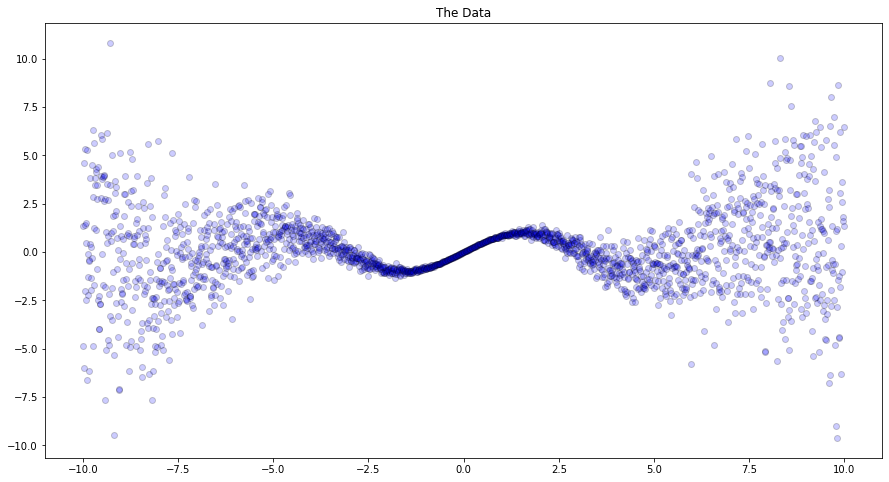

In [2]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color='blue', edgecolor='k', alpha=0.2)
ax.set(
    title='The Data'
)


## Custom Loss Function
- Predicting a value *too large* is not penalized as much for the 90th percentile. 
- Predicting a value *too small* is not penalized as much for the 10th percentile. 

In [3]:


def tilted_loss(q, y, f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)



In [6]:
# Unfortunately, requires 3 separate reruns. Alternative: Use tf.
preds = []

model = keras.Sequential([
    keras.layers.Dense(input_shape=(1,), units=50, activation='relu'),
    keras.layers.Dense(units=1, activation='linear'),  # p10 - point estimate p50 - p90

])

quantiles = [0.1, 0.5, 0.9]

for q in quantiles:
    model.compile('adam', loss=lambda y,f: tilted_loss(q, y, f))
    model.fit(x, y, epochs=33, batch_size=16)
    preds.append(model.predict(x))


Epoch 1/33
125/125 [==============================] - 0s 1ms/step - loss: 0.4382
Epoch 2/33
125/125 [==============================] - 0s 1ms/step - loss: 0.2881
Epoch 3/33
125/125 [==============================] - 0s 982us/step - loss: 0.2858
Epoch 4/33
125/125 [==============================] - 0s 1ms/step - loss: 0.2847
Epoch 5/33
125/125 [==============================] - 0s 918us/step - loss: 0.2852
Epoch 6/33
125/125 [==============================] - 0s 1ms/step - loss: 0.2836
Epoch 7/33
125/125 [==============================] - 0s 1ms/step - loss: 0.2825
Epoch 8/33
125/125 [==============================] - 0s 987us/step - loss: 0.2809
Epoch 9/33
125/125 [==============================] - 0s 892us/step - loss: 0.2826
Epoch 10/33
125/125 [==============================] - 0s 920us/step - loss: 0.2806
Epoch 11/33
125/125 [==============================] - 0s 964us/step - loss: 0.2802
Epoch 12/33
125/125 [==============================] - 0s 1ms/step - loss: 0.2794
Epoch 13/33
1

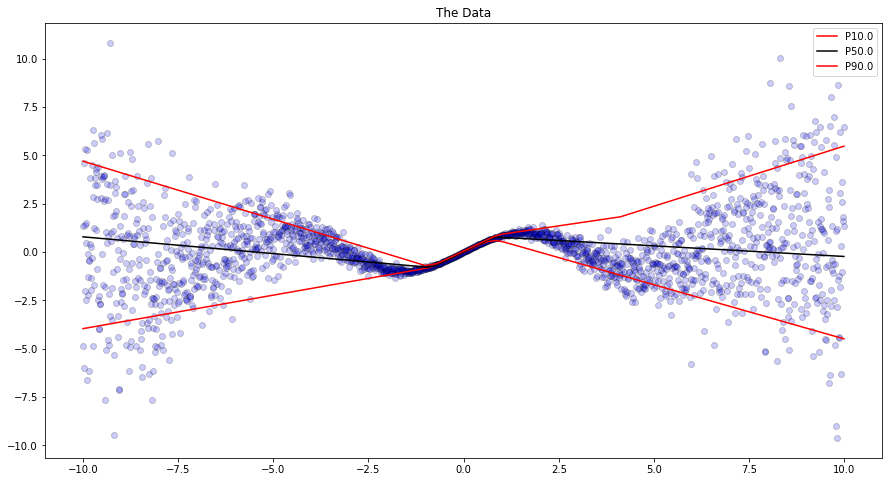

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x, y, color='blue', edgecolor='k', alpha=0.2)
ax.set(
    title='The Data'
)
for p, q, col in zip(preds, quantiles, ('red', 'black', 'red')):
    ax.plot(x, p, label=f"P{q*100}", color=col)
    plt.legend()
plt.show()